<a href="https://colab.research.google.com/github/Abhishek9264/model/blob/main/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# A data frame with 53940 rows and 10 variables:
# price: price in US dollars (\$326--\$18,823)
# carat: weight of the diamond (0.2--5.01)
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color: diamond colour, from J (worst) to D (best)
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# x: length in mm (0--10.74)
# y: width in mm (0--58.9)
# z: depth in mm (0--31.8)
# depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table: width of top of diamond relative to widest point (43--95)

In [ ]:
# what is the type of features in our dataset ?
# Is there any null value present in our dataset ?
# Are there any outliers present in our dataset ?
# find different types of relationship among different variables ?
# --> by categorical-numerical analysis
# -->by categorical-categorical analysis
# visualisation of dataset
# training of model
# testing of model



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('diamonds.csv')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
print(df.head(10))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


<ipython-input-412-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

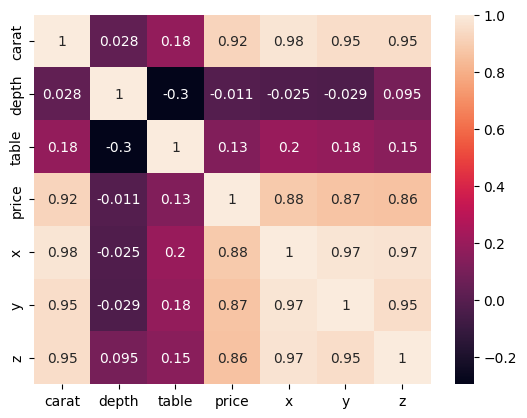

In [ ]:
sns.heatmap(df.corr(),annot=True)


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In this dataset,there are three categorical and rest are numerical features.

In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
df['color']=df['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
df['cut']=df['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df['clarity']=df['clarity'].map({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8})
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,3.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,0,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,6,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,2,2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
carat_cut=df.groupby('cut')['price'].sum()
carat_cut

cut
1     7017600
2    19275009
3    48107623
4    63221498
5    74513487
Name: price, dtype: int64

In [ ]:
pd.crosstab(df['cut'],df['color'])

color,0,1,2,3,4,5,6
cut,,,,,,,
1,119,175,303,314,312,224,163
2,307,522,702,871,909,933,662
3,678,1204,1824,2299,2164,2400,1513
4,808,1428,2360,2924,2331,2337,1603
5,896,2093,3115,4884,3826,3903,2834


In [ ]:
df.corr()['price'].sort_values(ascending=False)

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
table      0.127134
depth     -0.010647
cut       -0.053491
clarity   -0.146800
color     -0.172511
Name: price, dtype: float64

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,3.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:

for x in ['x','y','z']:
  df=df[(df[x]!=0)]


No zero value present in dimension because it actually not possible.



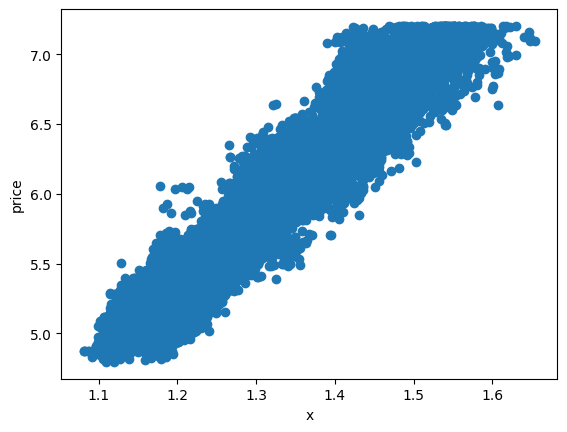

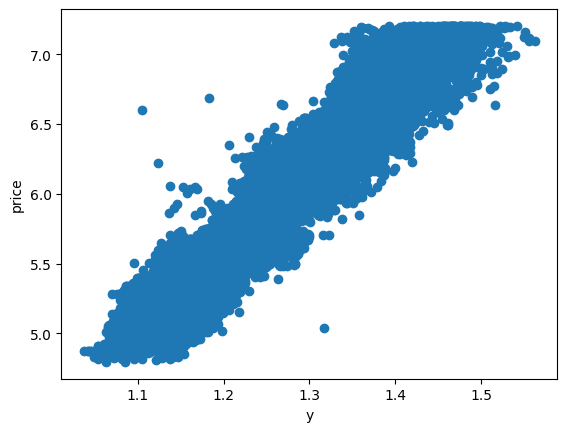

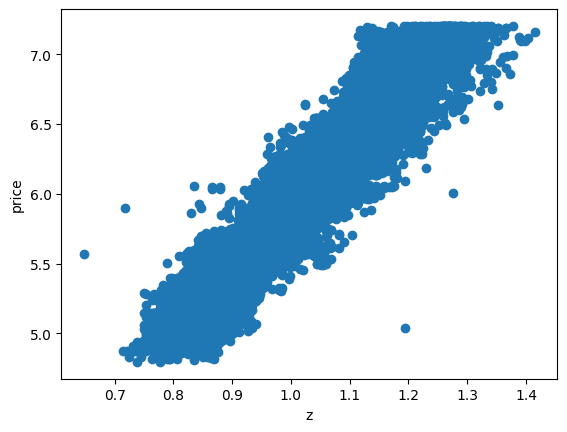

In [ ]:
value=['x','y','z']
for x in value:
  plt.scatter(x=df[x],y=df['price'])
  plt.xlabel(x)
  plt.ylabel('price')
  plt.show()

from this figure,it seem clear that price increases with the dimension of diamond.

In [ ]:
range_value=['carat','depth','table','price','x','y','z']

In [ ]:
for x in range_value:
  print(x,'->',df[x].skew())

carat -> 1.1162074750825512
depth -> -0.08172649837750892
table -> 0.7967994917187979
price -> 1.6183486340820077
x -> 0.39834750049248013
y -> 2.4622106083021604
z -> 1.5854897667150878


from here,we conclude that **carat** , **price** ,**y** and **z** are right skewed.

In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,3.405972,4.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,1.000000,0.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,2.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,5.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


I have done feature transformation on features because they are skewed


In [ ]:
# values=['carat','price','y','z']
# for x in values:
#   df[x]=np.log1p(df[x])

In [ ]:
for x in range_value:
  import scipy.stats as stats

# Assuming skewed data stored in a NumPy array called skewed_data
  df[x], lambda_param = stats.boxcox(df[x])

In [ ]:
print(lambda_param)

-0.30937464076366494


In [ ]:
# import scipy.stats as stats

# # Assuming your dataset is stored in a pandas DataFrame called df
# # Assuming the columns you want to transform are stored in a list called range_value

# for x in range_value:
#     df[x], lambda_param = stats.yeojohnson(df[x])


In [ ]:
 print(lambda_param)

-0.30937464076366494


In [ ]:
df.skew()

carat      0.020497
cut       -0.717188
color     -0.189630
clarity    0.551471
depth      0.068905
table      0.000000
price      0.025624
x          0.021765
y          0.021983
z          0.018383
dtype: float64

In [ ]:
for x in range_value:



  # Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the upper and lower bounds for outliers
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  # Count the number of outliers
  outliers_count = len(df[(df[x] < lower) | (df[x] > upper)])

  # Display the number of outliers
  print("Number of outliers:",x,'->', outliers_count)


Number of outliers: carat -> 0
Number of outliers: depth -> 2543
Number of outliers: table -> 253
Number of outliers: price -> 0
Number of outliers: x -> 0
Number of outliers: y -> 2
Number of outliers: z -> 5


In [ ]:
for x in range_value:
  mean=df[x].mean()
  std=df[x].std()
  upper=(mean+(3*std))
  lower=(mean-(3*std))
  outlier=len(df[(df[x] > upper) | (df[x]<lower)])
  print(x,'-->',outlier)

carat --> 2
depth --> 677
table --> 161
price --> 0
x --> 1
y --> 2
z --> 7


In [ ]:
no_out=0
for x in range_value:
  df[x].sort_values(ascending=True)

  # Specify the column you want to analyze for outliers
  column_name = x

  # Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the upper and lower bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count the number of outliers
  outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
  no_out=no_out+outliers_count
  # Display the number of outliers
  print("Number of outliers:",x,'->', outliers_count)




Number of outliers: carat -> 0
Number of outliers: depth -> 2543
Number of outliers: table -> 253
Number of outliers: price -> 0
Number of outliers: x -> 0
Number of outliers: y -> 2
Number of outliers: z -> 5


In [ ]:
for x in range_value:
  print(x,'-->',df[x].skew())

carat --> 0.020496626040174836
depth --> 0.0689050090687771
table --> 0.0
price --> 0.025624089338605893
x --> 0.02176536638409931
y --> 0.021983056700260017
z --> 0.01838253160108309


In [ ]:
print(no_out)

2803


In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,5.392000e+04,53920.000000,53920.000000,53920.000000,53920.000000
mean,-0.419602,3.904228,3.405972,4.051502,396.478958,2.418376e-01,6.044206,1.334672,1.278428,1.029414
std,0.606324,1.116579,1.701272,1.647005,14.349779,1.998779e-09,0.600480,0.113351,0.102384,0.131880
min,-1.739141,1.000000,0.000000,1.000000,225.194379,2.418375e-01,4.795646,1.081350,1.037197,0.066955
25%,-0.957399,3.000000,2.000000,3.000000,388.898148,2.418376e-01,5.494931,1.231133,1.185179,0.909598
50%,-0.362793,4.000000,3.000000,4.000000,396.892009,2.418376e-01,6.063015,1.345843,1.289663,1.044325
75%,0.039148,5.000000,5.000000,5.000000,403.934278,2.418376e-01,6.522882,1.424403,1.359831,1.133792
max,1.494032,5.000000,6.000000,8.000000,582.304280,2.418376e-01,7.203784,1.681649,2.122453,2.123912


In [ ]:
no_out=0
for x in range_value:
  mean=df[x].mean()
  std=df[x].std()
  upper=(mean+(3*std))
  lower=(mean-(3*std))
  outlier=len(df[(df[x] > upper) | (df[x]<lower)])
  no_out=no_out+outlier
  print(x,'-->',outlier)
print(no_out)

carat --> 2
depth --> 677
table --> 161
price --> 0
x --> 1
y --> 2
z --> 7
850


In [ ]:
no_out=0
for x in range_value:
  df[x].sort_values(ascending=True)

  # Specify the column you want to analyze for outliers
  column_name = x

  # Calculate the first quartile (Q1) and third quartile (Q3)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)

  # Calculate the IQR (Interquartile Range)
  IQR = Q3 - Q1

  # Define the upper and lower bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count the number of outliers
  outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
  no_out=no_out+outliers_count
  # Display the number of outliers
  print("Number of outliers:",x,'->', outliers_count)


print(no_out)

Number of outliers: carat -> 0
Number of outliers: depth -> 2543
Number of outliers: table -> 253
Number of outliers: price -> 0
Number of outliers: x -> 0
Number of outliers: y -> 2
Number of outliers: z -> 5
2803


In [ ]:
for x in range_value:
  mean=df[x].mean()
  std=df[x].std()
  upper=(mean+(3*std))
  lower=(mean-(3*std))

  df = df[df[x].between(lower, upper)]

In [ ]:
# for x in range_value:
#   df[x].sort_values(ascending=True)

#   # Specify the column you want to analyze for outliers
#   column_name = x

#   # Calculate the first quartile (Q1) and third quartile (Q3)
#   Q1 = df[column_name].quantile(0.25)
#   Q3 = df[column_name].quantile(0.75)

#   # Calculate the IQR (Interquartile Range)
#   IQR = Q3 - Q1

#   # Define the upper and lower bounds for outliers
#   lower= Q1 - 1.5 * IQR
#   upper= Q3 + 1.5 * IQR
#   df=df[df[x].between(lower,upper)]


In [ ]:
len(df)

53107

In [ ]:
x=df.drop('price',axis=1)
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:

model=RandomForestRegressor()


In [ ]:

model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


0.037588585654143546
0.0027843131551862107
0.05276659127882159


In [ ]:


# Create a DataFrame for test and train data
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_new)






         Actual  Predicted
25383  7.051997   7.055262
46986  5.895819   5.936331
34313  5.431080   5.432321
10232  6.457973   6.493448
16570  6.644407   6.661184
...         ...        ...
18263  6.707401   6.715172
52737  6.100736   6.115393
11848  6.498867   6.533793
46125  5.871336   5.949413
31656  5.360390   5.422293

[15933 rows x 2 columns]
